In [1]:
import detector
import importlib
import data_loader
import pandas as pd
import unet_detector
import seaborn as sn
import xception_freq_detector
import vanilla_pytorch_detector
import matplotlib.pyplot as plt

importlib.reload(detector)
importlib.reload(unet_detector)
importlib.reload(xception_freq_detector)
importlib.reload(vanilla_pytorch_detector)
importlib.reload(data_loader)

%matplotlib inline

In [2]:
detector_class = unet_detector.UNetFreqDetector
#detector_class = unet_detector.UNetSpatialDetector
#detector_class = xception_freq_detector.XceptionFreqDetector

fake_detector = detector_class()

In [3]:
dataset_loader = data_loader.CarDamageDatasetLoader()

train_ds, eval_ds, train_df, eval_df = dataset_loader.load_dataset()
print("Training Dataset Length: " + str(len(train_df)))
print("Evaluation Dataset Length: " + str(len(eval_df)))
print("\nSample Training Dataset:")
display(train_df[:2])

Training Dataset Length: 180
Evaluation Dataset Length: 20

Sample Training Dataset:


,id,image,label
0,/Users/akash/Code/car_images/dataset/fake/niss...,<PIL.Image.Image image mode=RGB size=224x224 a...,Fake
1,/Users/akash/Code/car_images/dataset/fake/ford...,<PIL.Image.Image image mode=RGB size=224x224 a...,Fake


Fake samples


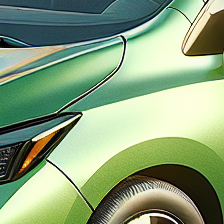

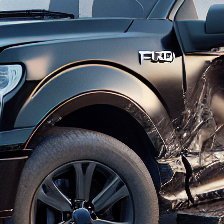

In [4]:
print("Fake samples")
for image in train_df[( train_df["label"] == "Fake")].iloc[:min(2, len(train_df))]["image"]:
    display(image)

Real samples


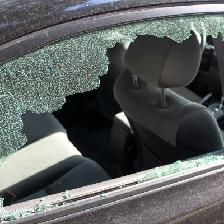

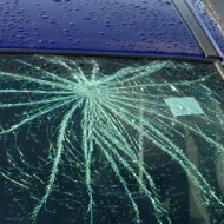

In [5]:
print("Real samples")
for image in train_df[( train_df["label"] == "Real")].iloc[:min(2, len(train_df))]["image"]:
    display(image)

In [6]:
model = fake_detector.get_model()
model

TwoStreamUNetClassifier(
  (spatial_stream): UNet(
    (enc1): UNetBlock(
      (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (enc2): UNetBlock(
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (enc3): UNetBlock(
      (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  

In [7]:
epochs = 10
batch_size = 16

fake_detector.train_model(train_ds, eval_ds, epochs, batch_size)
checkpoint_filename = f"{fake_detector.__class__.__name__}_best.pth"

print(f"\nModel trained for {str(epochs)} epochs, best epoch: {epochs}, checkpoint in {checkpoint_filename}")

Epoch 1/10 (Eval):   0%|          | 0/2 [00:00<?, ?it/s]/opt/miniconda3/envs/car_images/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
Epoch 1/10 (Eval): 100%|██████████| 2/2 [00:00<00:00,  4.20it/s]


Epoch 1/10 Summary:
Train Loss: 0.5163
Eval Loss: 0.9665
Train Metrics: {'accuracy': np.float64(0.7291666666666666), 'precision': np.float64(0.7677355775012025), 'recall': np.float64(0.7291666666666666), 'bad_predictions': np.float64(4.333333333333333)}
Eval Metrics: {'accuracy': np.float64(0.6875), 'precision': np.float64(0.5703125), 'recall': np.float64(0.6875), 'bad_predictions': np.float64(5.0)}

New best precision: 0.5703, saving checkpoint to UNetFreqDetector_epoch_1.pth



Epoch 2/10 (Eval):   0%|          | 0/2 [00:00<?, ?it/s]/opt/miniconda3/envs/car_images/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
Epoch 2/10 (Eval): 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]


Epoch 2/10 Summary:
Train Loss: 0.2964
Eval Loss: 1.7822
Train Metrics: {'accuracy': np.float64(0.9010416666666666), 'precision': np.float64(0.9281001984126984), 'recall': np.float64(0.9010416666666666), 'bad_predictions': np.float64(1.5833333333333333)}
Eval Metrics: {'accuracy': np.float64(0.6875), 'precision': np.float64(0.5703125), 'recall': np.float64(0.6875), 'bad_predictions': np.float64(5.0)}



Epoch 3/10 (Eval): 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]


Epoch 3/10 Summary:
Train Loss: 0.2172
Eval Loss: 0.2458
Train Metrics: {'accuracy': np.float64(0.921875), 'precision': np.float64(0.9402839781746032), 'recall': np.float64(0.921875), 'bad_predictions': np.float64(1.25)}
Eval Metrics: {'accuracy': np.float64(0.9375), 'precision': np.float64(0.9375), 'recall': np.float64(0.9375), 'bad_predictions': np.float64(1.0)}

New best precision: 0.9375, saving checkpoint to UNetFreqDetector_epoch_3.pth



Epoch 4/10 (Eval): 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]


Epoch 4/10 Summary:
Train Loss: 0.1163
Eval Loss: 0.0950
Train Metrics: {'accuracy': np.float64(0.9635416666666666), 'precision': np.float64(0.9758680555555556), 'recall': np.float64(0.9635416666666666), 'bad_predictions': np.float64(0.3333333333333333)}
Eval Metrics: {'accuracy': np.float64(0.9375), 'precision': np.float64(0.953125), 'recall': np.float64(0.9375), 'bad_predictions': np.float64(1.0)}

New best precision: 0.9531, saving checkpoint to UNetFreqDetector_epoch_4.pth



Epoch 5/10 (Eval): 100%|██████████| 2/2 [00:00<00:00,  4.36it/s]


Epoch 5/10 Summary:
Train Loss: 0.1151
Eval Loss: 0.2946
Train Metrics: {'accuracy': np.float64(0.9635416666666666), 'precision': np.float64(0.9731770833333333), 'recall': np.float64(0.9635416666666666), 'bad_predictions': np.float64(0.5833333333333334)}
Eval Metrics: {'accuracy': np.float64(0.96875), 'precision': np.float64(0.9715909090909091), 'recall': np.float64(0.96875), 'bad_predictions': np.float64(0.5)}

New best precision: 0.9716, saving checkpoint to UNetFreqDetector_epoch_5.pth



Epoch 6/10 (Eval): 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]


Epoch 6/10 Summary:
Train Loss: 0.1354
Eval Loss: 0.9570
Train Metrics: {'accuracy': np.float64(0.9322916666666666), 'precision': np.float64(0.9480200066137567), 'recall': np.float64(0.9322916666666666), 'bad_predictions': np.float64(1.0833333333333333)}
Eval Metrics: {'accuracy': np.float64(0.78125), 'precision': np.float64(0.8990384615384616), 'recall': np.float64(0.78125), 'bad_predictions': np.float64(3.5)}



Epoch 7/10 (Eval): 100%|██████████| 2/2 [00:00<00:00,  4.20it/s]


Epoch 7/10 Summary:
Train Loss: 0.2005
Eval Loss: 0.2670
Train Metrics: {'accuracy': np.float64(0.9114583333333334), 'precision': np.float64(0.955315806878307), 'recall': np.float64(0.9114583333333334), 'bad_predictions': np.float64(1.4166666666666667)}
Eval Metrics: {'accuracy': np.float64(0.90625), 'precision': np.float64(0.9117063492063492), 'recall': np.float64(0.90625), 'bad_predictions': np.float64(1.5)}



Epoch 8/10 (Eval): 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]


Epoch 8/10 Summary:
Train Loss: 0.1015
Eval Loss: 0.1819
Train Metrics: {'accuracy': np.float64(0.9583333333333334), 'precision': np.float64(0.9788690476190475), 'recall': np.float64(0.9583333333333334), 'bad_predictions': np.float64(0.4166666666666667)}
Eval Metrics: {'accuracy': np.float64(0.96875), 'precision': np.float64(0.9715909090909091), 'recall': np.float64(0.96875), 'bad_predictions': np.float64(0.5)}



Epoch 9/10 (Eval): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]


Epoch 9/10 Summary:
Train Loss: 0.0750
Eval Loss: 0.3584
Train Metrics: {'accuracy': np.float64(0.9791666666666666), 'precision': np.float64(0.9821738591269842), 'recall': np.float64(0.9791666666666666), 'bad_predictions': np.float64(0.3333333333333333)}
Eval Metrics: {'accuracy': np.float64(0.9375), 'precision': np.float64(0.953125), 'recall': np.float64(0.9375), 'bad_predictions': np.float64(1.0)}



Epoch 10/10 (Eval): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]


Epoch 10/10 Summary:
Train Loss: 0.0368
Eval Loss: 0.2443
Train Metrics: {'accuracy': np.float64(1.0), 'precision': np.float64(1.0), 'recall': np.float64(1.0), 'bad_predictions': np.float64(0.0)}
Eval Metrics: {'accuracy': np.float64(0.9375), 'precision': np.float64(0.953125), 'recall': np.float64(0.9375), 'bad_predictions': np.float64(1.0)}


Best precision: 0.9716, at epoch 5, loading checkpoint from: UNetFreqDetector_epoch_5.pth


Model trained for 10 epochs, best epoch: 10, checkpoint in UNetFreqDetector_best.pth


In [8]:
fake_detector.save_checkpoint(checkpoint_filename)
print(f"Saved model to {checkpoint_filename}")

Saved model to UNetFreqDetector_best.pth


In [9]:
eval_detector = detector_class()
eval_detector.get_model()
eval_detector.load_checkpoint(checkpoint_filename)

Accuracy:		95.00
Bad Predictions:	0/20
{}


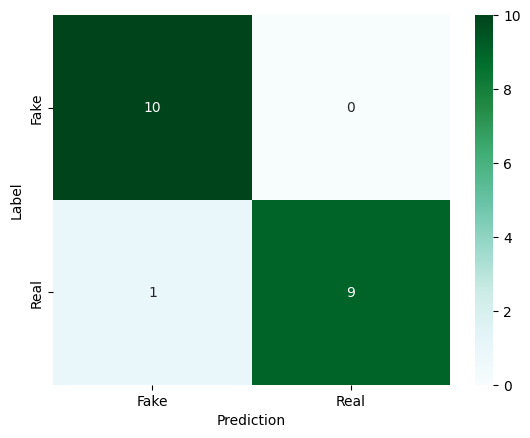

,Fake,Real
Fake,10,0
Real,1,9


,label,precision,recall
0,Real,0.9,1.000000
1,Fake,1.0,0.909091


In [10]:
y_true, y_pred, images, df_cm, df_metrics, accuracy, bad_prediction_count, bad_predictions = eval_detector.evaluate_model(eval_ds)
df_results = pd.DataFrame(zip(y_true, y_pred, images), columns=["Label", "Prediction", "Image"])

print(f"Accuracy:\t\t{accuracy:.2f}")
print(f"Bad Predictions:\t{bad_prediction_count}/{len(y_true)}")
print(bad_predictions)

plt.figure()
sn.heatmap(df_cm, annot=True, fmt="d", cmap='BuGn')
plt.xlabel("Prediction")
plt.ylabel("Label")
plt.show()
display(df_cm)

display(df_metrics)

In [11]:
def display_sample_failures(df, label, prediction):
    images = df[(df["Label"] == label) & (df["Prediction"] == prediction)]["Image"]
    print(f"Found {len(images)} samples with label '{label}' and prediction '{prediction}'")

    for i in range(min(5, len(images))):
        display(images.iloc[i])


display_sample_failures(df_results, label="Fake", prediction="Real")

Found 0 samples with label 'Fake' and prediction 'Real'
